In [2]:
Data=pd.read_csv('imdb_top_1000.csv')

Accuracy: 0.65
              precision    recall  f1-score   support

        High       0.33      0.03      0.05        68
      Medium       0.66      0.97      0.79       132

    accuracy                           0.65       200
   macro avg       0.50      0.50      0.42       200
weighted avg       0.55      0.65      0.54       200



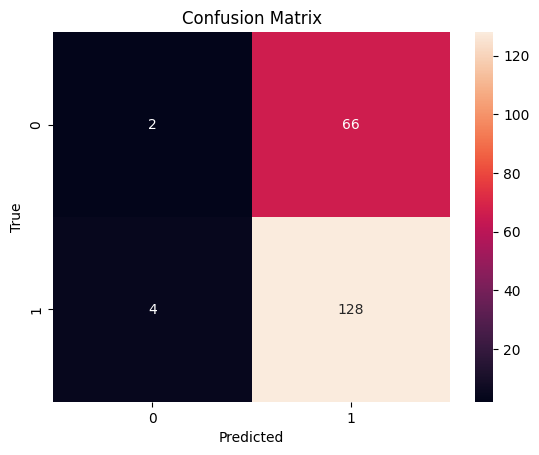

In [4]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming 'Genre' is the column you want to classify
X = Data['Genre']

# Choose a suitable categorical column as the target variable
# For example, you can create a new categorical column based on IMDB_Rating:
Data['Rating_Category'] = pd.cut(Data['IMDB_Rating'], bins=[0, 7, 8, 9, 10], labels=['Low', 'Medium', 'High', 'Very High'])
y = Data['Rating_Category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train_vec, y_train)  # Now using a categorical target variable

# Make predictions
y_pred = model.predict(X_test_vec)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()